beta 35.0
 
spin = dn, orb_1 = 0, orb_2 = 0


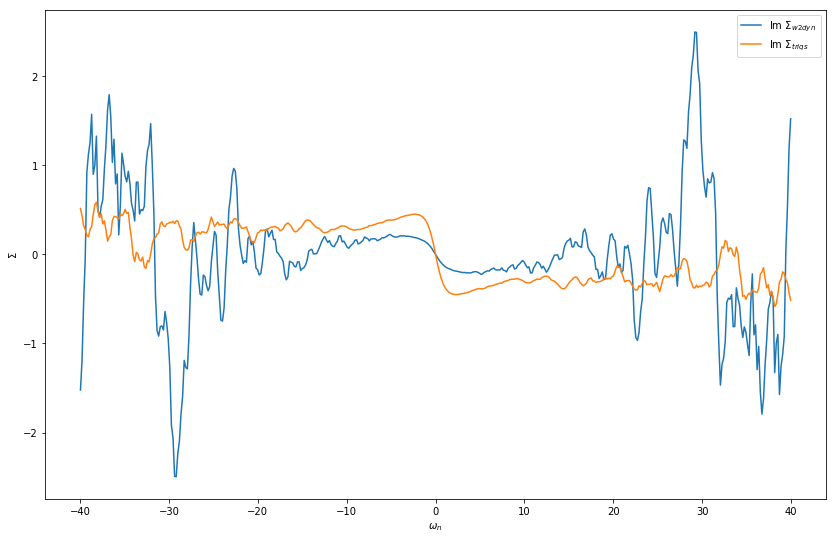

 
spin = dn, orb_1 = 1, orb_2 = 1


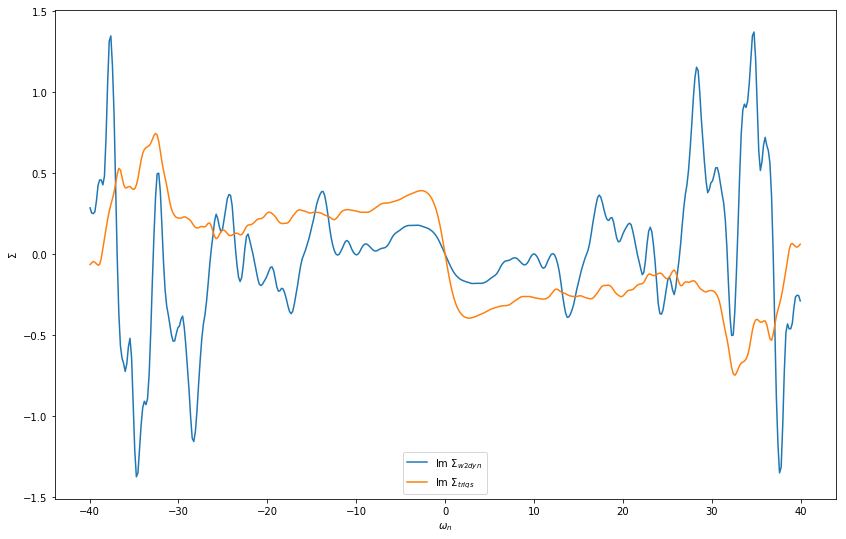

 
spin = dn, orb_1 = 2, orb_2 = 2


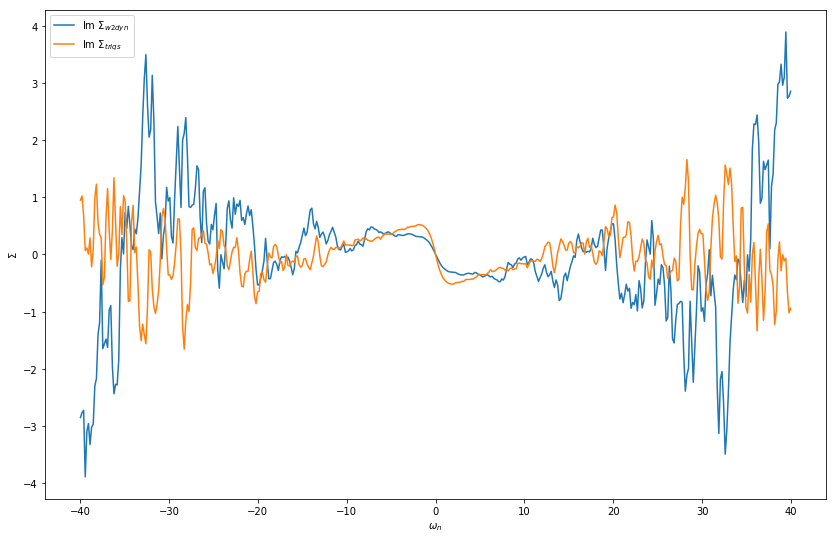

 
spin = up, orb_1 = 0, orb_2 = 0


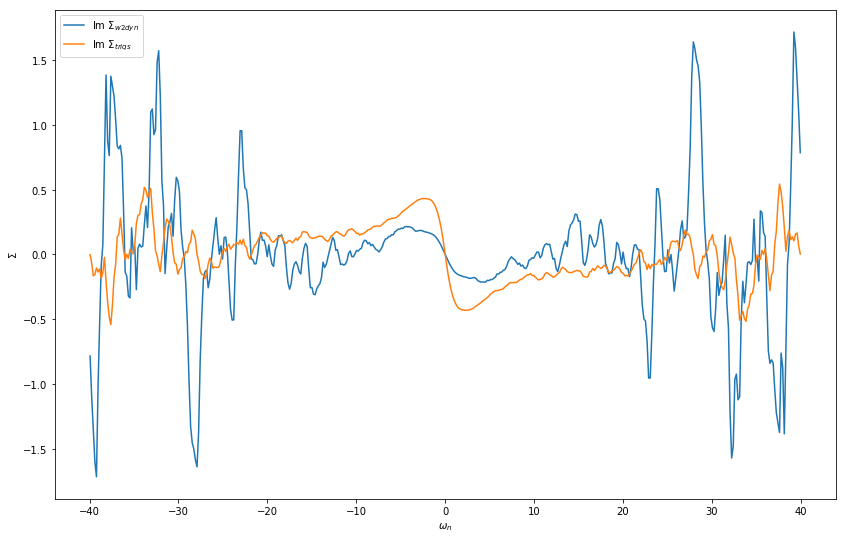

 
spin = up, orb_1 = 1, orb_2 = 1


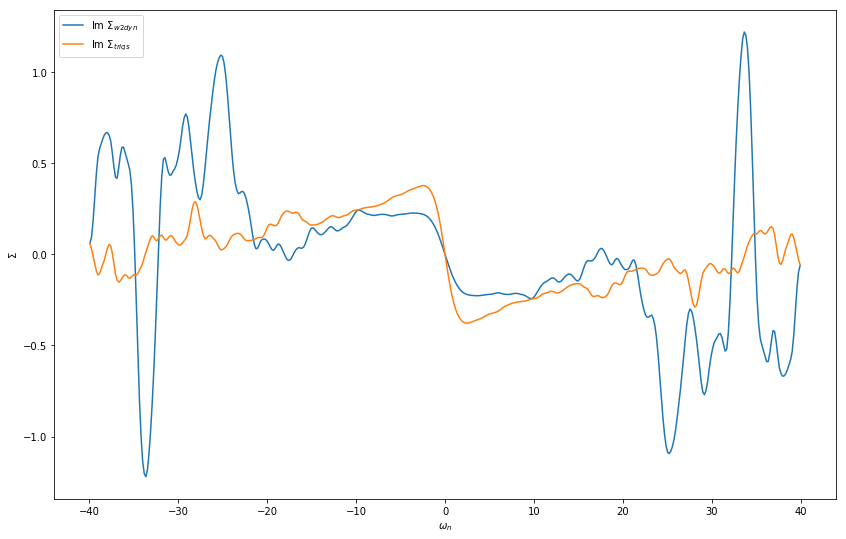

 
spin = up, orb_1 = 2, orb_2 = 2


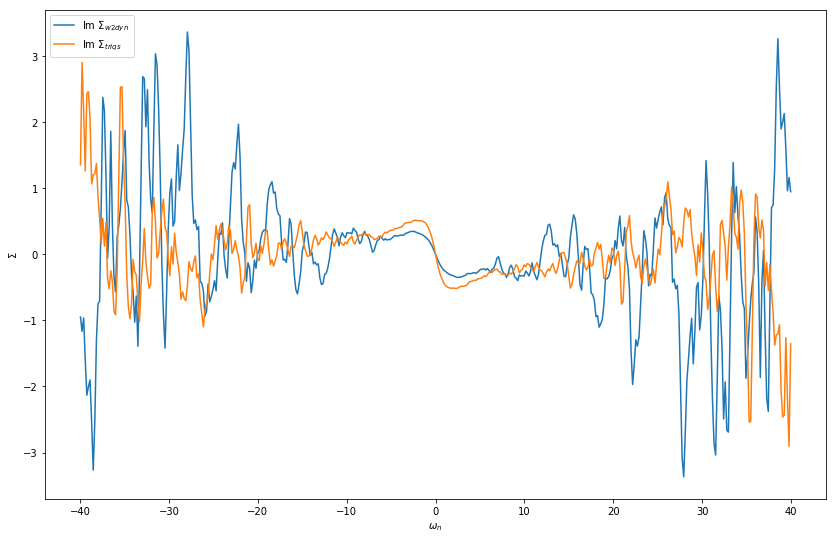

 
spin = dn, orb_1 = 0, orb_2 = 0


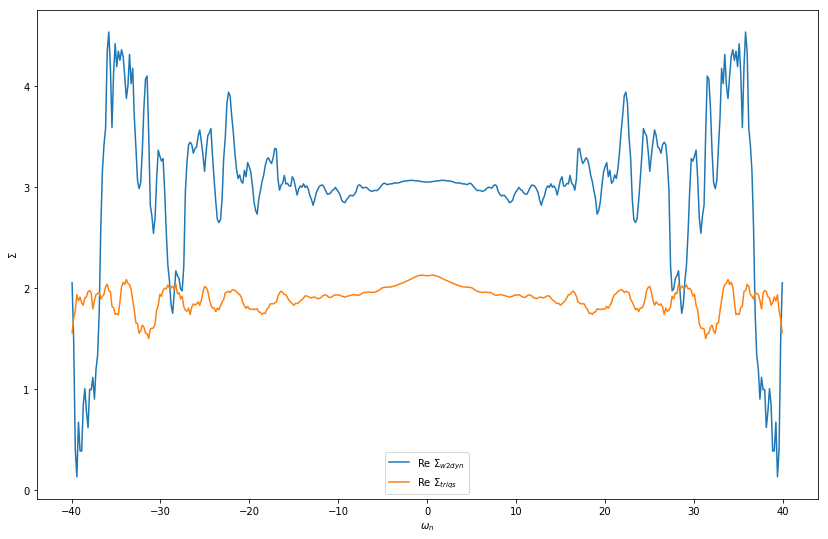

 
spin = dn, orb_1 = 1, orb_2 = 1


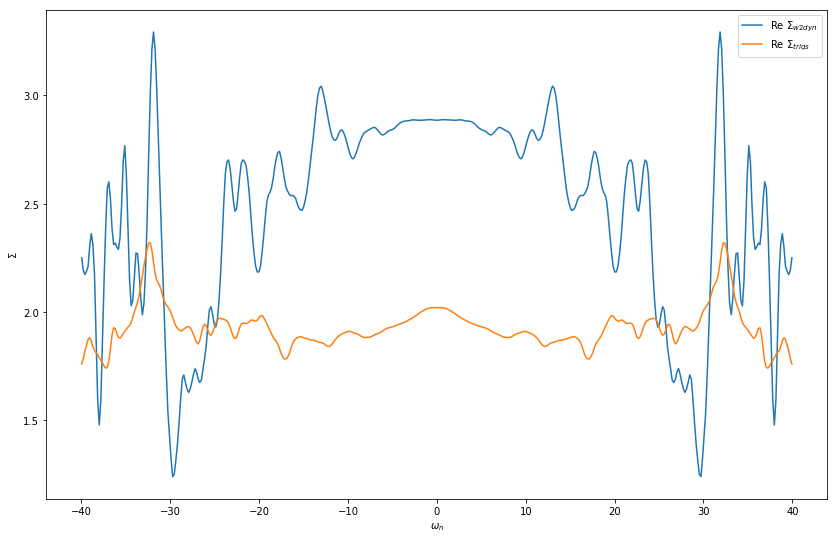

 
spin = dn, orb_1 = 2, orb_2 = 2


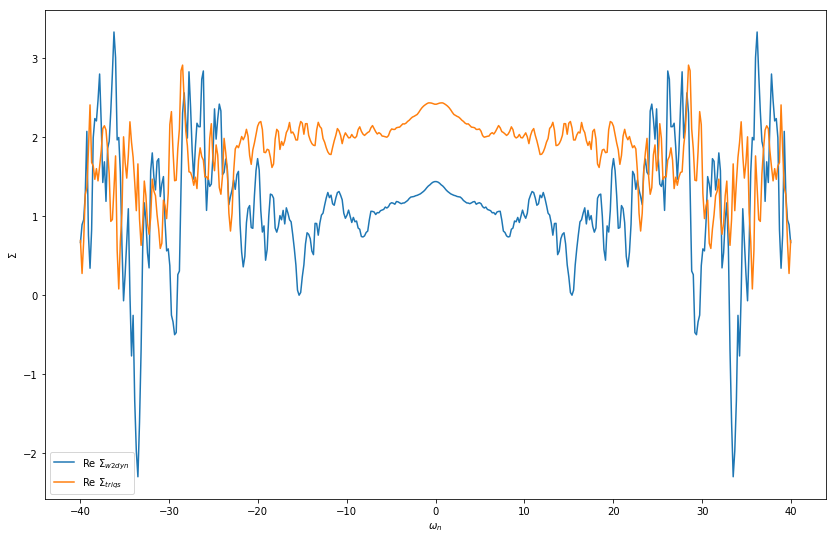

 
spin = up, orb_1 = 0, orb_2 = 0


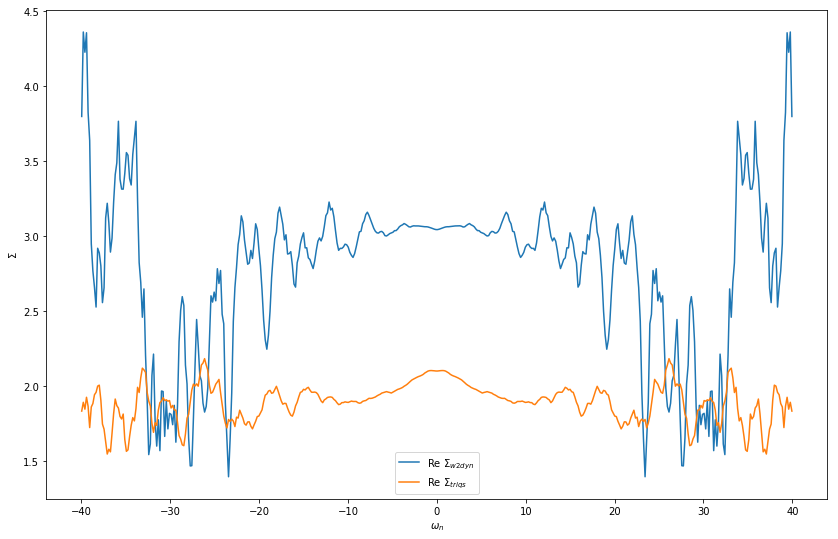

 
spin = up, orb_1 = 1, orb_2 = 1


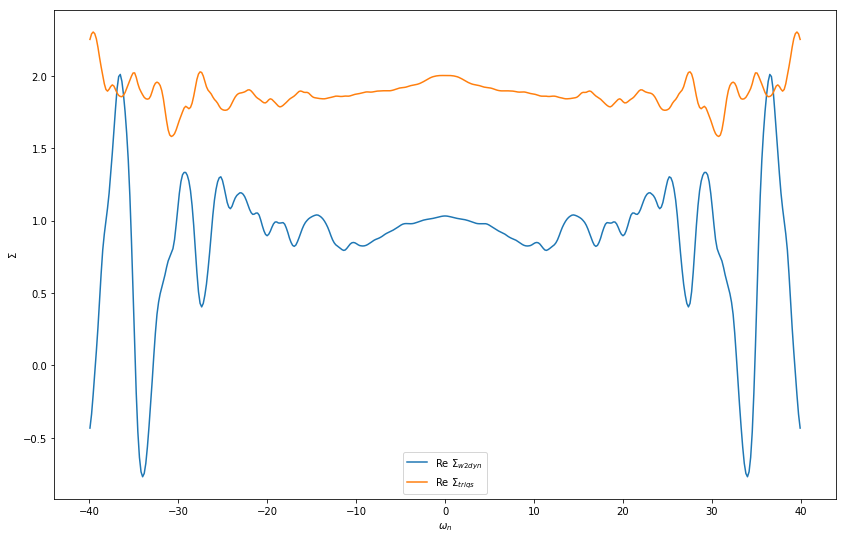

 
spin = up, orb_1 = 2, orb_2 = 2


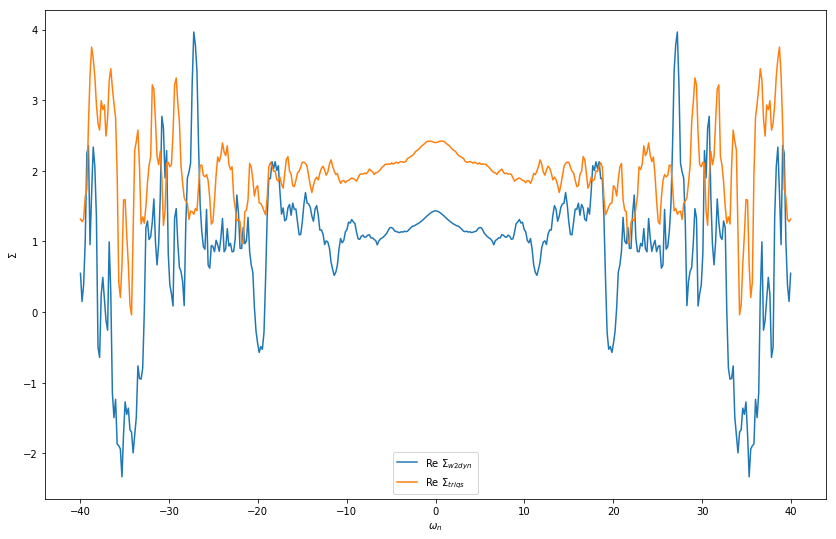

In [2]:
import sys, os, time
sys.path.append(os.getcwd() + "/..")
sys.path.append(os.getcwd() + "/../../common/")
from model import *

from pytriqs.gf import *
from pytriqs.archive import *
from pytriqs.plot.mpl_interface import oplot, oploti, oplotr, plt
import numpy as np
plt.rcParams["figure.figsize"] = (14,9)
#plt.rcParams["figure.figsize"] = (10,6)

w2dyn = HDFArchive('results_250/w2dyn_cthyb___onlygiw.h5','r')
triqs = HDFArchive('results_250/cthyb___onlygiw.h5','r')

beta = w2dyn["G/dn/mesh/domain/beta"]
print "beta", beta

for m in {"I", "R"}:
    for s in {"up", "dn"}:
        for b in range(0,3):

            print ' '
            print "spin = " + str(s) + ", orb_1 = " + str(b) + ", orb_2 = " + str(b)

            sigma_w2dyn = G0_iw.copy()
            sigma_w2dyn << inverse(G0_iw) - inverse(w2dyn["G"])
            sigma_triqs = G0_iw.copy()
            sigma_triqs << inverse(G0_iw) - inverse(triqs["G"])

            oplot(sigma_w2dyn[s][b,b], '-', x_window = (-40,40), mode = m, name = "$\Sigma_{w2dyn}$")
            oplot(sigma_triqs[s][b,b], '-', x_window = (-40,40), mode = m, name = "$\Sigma_{triqs}$")
            plt.legend(loc = 'best')
            plt.ylabel("$\Sigma$")
            plt.show()